<a href="https://colab.research.google.com/github/dianitapuspitasari27/data/blob/main/Analisis_Sentimen_Studi_Kasus_Folkative(UN)__%5BUAS_DATMIN%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/scrap_folkative_un.csv')
df2 = pd.read_csv('/content/scrap_kemendikdasmen_un.csv')

In [ ]:
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined

,username,text
0,caksur_1,Adakan UN lagi pak biar tiba² pada rajin tahaj...
1,mcblushgift,"Welcome back, UN 🔥"
2,moooo24_,alesan putus karna fokus ujian balik lagi neh😂
3,ciciekaaryanti,Please UN comeback 🔥
4,frhntafn_,udahan dulu ya aku mau fokus un
...,...,...
1165,abmaallqisa,"@wandiansyahsc No, saat siswa ga punya target ..."
1166,imaismed,Adain aja pak.. Saya GURU saya butuh UN.. sisw...
1167,adam.wn,"Ujian Nasional itu cuma formalitas, nggak rele..."
1168,muh.waskitoardhi,Adain UN aja Pak..


In [ ]:
# df_combined = pd.read_csv('/content/df_filter_folkative.csv')

In [ ]:
# # Menghapus kolom 'Unnamed: 0' dari df_combined
# df_combined = df_combined.drop(columns=['Unnamed: 0'], errors='ignore')
# df_combined

In [ ]:
# Memfilter baris berdasarkan keyword "UN", "un", atau "ujian" pada kolom 'text'
df_filtered = df_combined[df_combined['text'].str.contains(r'\b(UN|un|ujian|Ujian)\b', case=False, na=False)]
df_filtered = df_filtered.reset_index(drop=True)

# Menampilkan hasil
df_filtered

<ipython-input-6-96b15b95e3f9>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df_combined[df_combined['text'].str.contains(r'\b(UN|un|ujian|Ujian)\b', case=False, na=False)]


,username,text
0,caksur_1,Adakan UN lagi pak biar tiba² pada rajin tahaj...
1,mcblushgift,"Welcome back, UN 🔥"
2,moooo24_,alesan putus karna fokus ujian balik lagi neh😂
3,ciciekaaryanti,Please UN comeback 🔥
4,frhntafn_,udahan dulu ya aku mau fokus un
...,...,...
980,galang12,"Ujian Nasional nggak bawa perubahan, cuma biki..."
981,angga.prw,Baliknya UN bikin suasana belajar makin nggak ...
982,imaismed,Adain aja pak.. Saya GURU saya butuh UN.. sisw...
983,adam.wn,"Ujian Nasional itu cuma formalitas, nggak rele..."


In [ ]:
# Mengecek jumlah data null/NaN per kolom
print("Jumlah data null/NaN per kolom:")
print(df_filtered.isnull().sum())

# Mengecek jumlah nilai 0 per kolom
print("\nJumlah nilai 0 per kolom:")
print((df_filtered == 0).sum())

# Mengecek jumlah baris duplikat
print("\nJumlah baris duplikat:")
print(df_filtered.duplicated().sum())

# Menampilkan semua baris yang duplikat
print("\nBaris yang duplikat:")
print(df_filtered[df_combined.duplicated()])

Jumlah data null/NaN per kolom:
username    0
text        0
dtype: int64

Jumlah nilai 0 per kolom:
username    0
text        0
dtype: int64

Jumlah baris duplikat:
0

Baris yang duplikat:
Empty DataFrame
Columns: [username, text]
Index: []


<ipython-input-7-fba9e359c09e>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_filtered[df_combined.duplicated()])


In [ ]:
df_filtered.to_csv('df_filter_new.csv')

#Labelling

In [ ]:
# import pandas as pd

In [ ]:
df = df_filtered

In [ ]:
df_filtered

,username,text
0,caksur_1,Adakan UN lagi pak biar tiba² pada rajin tahaj...
1,mcblushgift,"Welcome back, UN 🔥"
2,moooo24_,alesan putus karna fokus ujian balik lagi neh😂
3,ciciekaaryanti,Please UN comeback 🔥
4,frhntafn_,udahan dulu ya aku mau fokus un
...,...,...
980,galang12,"Ujian Nasional nggak bawa perubahan, cuma biki..."
981,angga.prw,Baliknya UN bikin suasana belajar makin nggak ...
982,imaismed,Adain aja pak.. Saya GURU saya butuh UN.. sisw...
983,adam.wn,"Ujian Nasional itu cuma formalitas, nggak rele..."


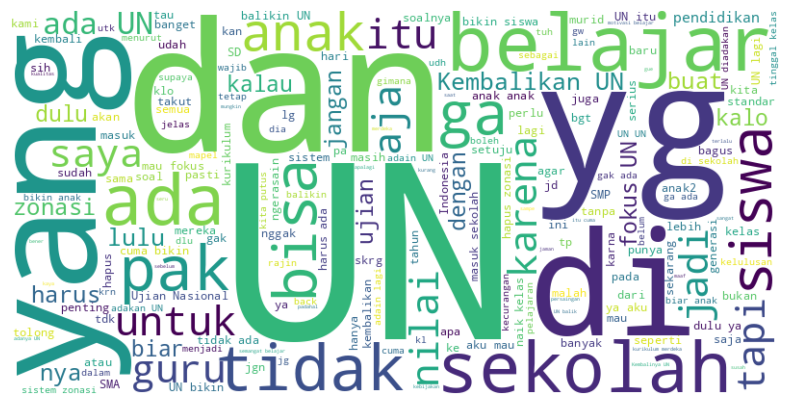

In [ ]:
# Import libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan DataFrame df sudah ada dan kolom 'text' berisi teks yang ingin dipetakan

# Gabungkan semua teks dalam kolom 'text' menjadi satu string
text = ' '.join(df['text'].astype(str).tolist())

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan wordcloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tidak menampilkan axis
plt.show()

In [ ]:
import re
# Fungsi untuk menghilangkan emotikon
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emotikon wajah
        u"\U0001F300-\U0001F5FF"  # Simbol dan Piktogram
        u"\U0001F680-\U0001F6FF"  # Transportasi dan Simbol Terkait
        u"\U0001F700-\U0001F77F"  # Simbol Kode Unicode Lainnya
        u"\U0001F780-\U0001F7FF"  # Simbol Kode Unicode Lainnya
        u"\U0001F800-\U0001F8FF"  # Simbol Kode Unicode Lainnya
        u"\U0001F900-\U0001F9FF"  # Simbol Kode Unicode Lainnya
        u"\U0001FA00-\U0001FA6F"  # Simbol Kode Unicode Lainnya
        u"\U0001FA70-\U0001FAFF"  # Simbol Kode Unicode Lainnya
        u"\U00002702-\U000027B0"  # Simbol Berbagai
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Fungsi untuk membersihkan teks
def clean_text(text):
    if not isinstance(text, str):
        return text
    text = re.sub(r'http[s]?://\S+', '', text)  # Menghilangkan link
    text = re.sub(r'@\w+', '', text)    # Menghilangkan nama akun (mention)
    text = re.sub(r'#\w+', '', text)    # Menghilangkan hashtag
    text = re.sub(r'<[^>]*>', '', text) #Menghapus tag html
    text = re.sub(r'&;', '', text) # menghapus simbol &;
    text = re.sub(r'<a\s+href="', '', text) #menghapus <a href="
    text = re.sub(r'<br\s*/?>', ' ', text)  # Menghilangkan <br> dan <br/>
    text = re.sub(r'<del\s*/?>', ' ', text)  # Menghilangkan <del> dan </del>
    # text = re.sub(r'(.)\1{1,}', r'\1', text)   # Menormalisasi pengulangan karakter
    text = re.sub(r'&amp;|&quot;', '', text)  # Menghapus karakter &amp; dan &quot;
    text = re.sub(r'\(\)', '', text) # Menghapus tanda kurung ()
    text = remove_emojis(text)          # Menghilangkan emotikon
    return text
# Mengaplikasikan fungsi clean_text ke setiap entri dalam kolom 'text'
df['cleaned_text'] = df['text'].apply(clean_text)
df = df[df['text'].str.strip() != '']
df = df.dropna()
df = df.drop_duplicates(subset='cleaned_text')
# Menampilkan DataFrame dengan kolom 'text' yang sudah dibersihkan
df.reset_index(drop=True, inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Fungsi untuk normalisasi teks menggunakan kamus alay
def normalize_text(text, normalization_dict):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Muat kamus alay dan bersihkan spasi tambahan
kamus_path = '/content/drive/MyDrive/Dataset/kamusalay.csv'
kamus_id = pd.read_csv(kamus_path, usecols=["slang", "formal"])
kamus_id['slang'] = kamus_id['slang'].str.strip().str.lower()
kamus_id['formal'] = kamus_id['formal'].str.strip().str.lower()
normalization_dict_id = dict(zip(kamus_id['slang'], kamus_id['formal']))

# Terapkan fungsi normalisasi ke kolom teks yang sudah dibersihkan
df['normalized_text'] = df['cleaned_text'].apply(lambda x: normalize_text(x, normalization_dict_id))

# Menampilkan DataFrame dengan teks yang sudah dibersihkan dan dinormalisasi
# print(df[['cleaned_text', 'normalized_text']].head())
df

,username,text,cleaned_text,normalized_text
0,caksur_1,Adakan UN lagi pak biar tiba² pada rajin tahaj...,Adakan UN lagi pak biar tiba² pada rajin tahaj...,Adakan UN lagi pak biar tiba² pada rajin tahaj...
1,mcblushgift,"Welcome back, UN 🔥","Welcome back, UN","Welcome back, UN"
2,moooo24_,alesan putus karna fokus ujian balik lagi neh😂,alesan putus karna fokus ujian balik lagi neh,alesan putus karena fokus ujian balik lagi nih
3,ciciekaaryanti,Please UN comeback 🔥,Please UN comeback,Please UN comeback
4,frhntafn_,udahan dulu ya aku mau fokus un,udahan dulu ya aku mau fokus un,udahan dulu ya aku mau fokus un
...,...,...,...,...
968,galang12,"Ujian Nasional nggak bawa perubahan, cuma biki...","Ujian Nasional nggak bawa perubahan, cuma biki...","Ujian Nasional enggak bawa perubahan, cuma bik..."
969,angga.prw,Baliknya UN bikin suasana belajar makin nggak ...,Baliknya UN bikin suasana belajar makin nggak ...,Baliknya UN bikin suasana belajar makin enggak...
970,imaismed,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,Adain saja pak.. Saya GURU saya butuh UN.. sis...
971,adam.wn,"Ujian Nasional itu cuma formalitas, nggak rele...","Ujian Nasional itu cuma formalitas, nggak rele...","Ujian Nasional itu cuma formalitas, enggak rel..."


In [ ]:
# Convert Bahasa
!pip install googletrans==3.1.0a0

from googletrans import Translator

translator = Translator()

def translate_to_english(text):
    try:
        translated = translator.translate(text, dest='en')
        return translated.text
    except Exception as e:
        print(f"Translation error: {e}")
        return text

df['english_text'] = df['cleaned_text'].apply(translate_to_english)

print(df[['normalized_text', 'english_text']].head())

# Menyimpan data dengan kolom baru ke file baru
output_file = '/content/drive/MyDrive/Dataset/translated_data.csv'
df.to_csv(output_file, index=False)

print(f"File dengan kolom sentimen berhasil disimpan di {output_file}")

                                     normalized_text  \
0  Adakan UN lagi pak biar tiba² pada rajin tahaj...   
1                                   Welcome back, UN   
2     alesan putus karena fokus ujian balik lagi nih   
3                                 Please UN comeback   
4                    udahan dulu ya aku mau fokus un   

                                        english_text  
0  Hold the UN again, sir, so that suddenly you c...  
1                                   Welcome back, UN  
2  The reason for breaking up is because I'm focu...  
3                                 Please UN comeback  
4             That's enough for now, I want to focus  
File dengan kolom sentimen berhasil disimpan di /content/drive/MyDrive/Dataset/translated_data.csv


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon jika belum tersedia
nltk.download('vader_lexicon')

# Membaca file CSV
data = df
# Inisialisasi SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Fungsi untuk menentukan sentimen dengan penanganan netral
def get_sentiment_vader(review):
    scores = sia.polarity_scores(review)
    compound_score = scores['compound']

    # Klasifikasi sentimen
    if compound_score > 0.05:
        return 'positive'
    elif compound_score < -0.05:
        return 'negative'
    else:
        # Jika compound_score di antara -0.05 dan 0.05, anggap netral sebagai negatif atau positif
        # Disesuaikan dengan polaritas atau aturan tertentu
        return 'netral'  # Atau 'positif', sesuaikan sesuai preferensi

# Menambahkan kolom 'vader_lexicon' berdasarkan analisis review
data['vader_lexicon'] = data['english_text'].apply(get_sentiment_vader)

# Menyimpan data dengan kolom baru ke file baru
output_file_vader = '/content/drive/MyDrive/Dataset/vader_labeled_data.csv'
data.to_csv(output_file_vader, index=False)

print(f"File dengan kolom sentimen berhasil disimpan di {output_file_vader}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


File dengan kolom sentimen berhasil disimpan di /content/drive/MyDrive/Dataset/vader_labeled_data.csv


In [ ]:
# Install library jika belum terpasang
!pip install pandas textblob

from textblob import TextBlob

# Fungsi untuk menentukan sentimen dengan penanganan netral
def get_sentiment_textblob(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity

    # Klasifikasi sentimen
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        # Jika polarity antara -0.05 dan 0.05, anggap netral sebagai negatif atau positif
        return 'netral'  # Atau 'positif', sesuaikan sesuai preferensi

# Menambahkan kolom 'textblob' berdasarkan analisis review
data['textblob'] = data['english_text'].apply(get_sentiment_textblob)

# Menyimpan data dengan kolom baru ke file baru
output_file_textblob = '/content/drive/MyDrive/Dataset/textblob_labeled_data.csv'
data.to_csv(output_file_textblob, index=False)

print(f"File dengan kolom sentimen berhasil disimpan di {output_file_textblob}")

File dengan kolom sentimen berhasil disimpan di /content/drive/MyDrive/Dataset/textblob_labeled_data.csv


In [ ]:
pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load model sentiment analysis dengan 3 kelas
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Inisialisasi pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Fungsi untuk analisis sentimen
def analyze_sentiment(text):
    try:
        result = sentiment_pipeline(text)
        return result[0]['label'].lower()  # Label: POSITIVE, NEGATIVE, NEUTRAL
    except Exception as e:
        return "Error"  # Untuk menangani error

# Terapkan fungsi ke kolom 'text'
data['roberta'] = data['english_text'].apply(analyze_sentiment)

# Tampilkan hasil
data

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


,username,text,cleaned_text,normalized_text,english_text,vader_lexicon,textblob,roberta
0,caksur_1,Adakan UN lagi pak biar tiba² pada rajin tahaj...,Adakan UN lagi pak biar tiba² pada rajin tahaj...,Adakan UN lagi pak biar tiba² pada rajin tahaj...,"Hold the UN again, sir, so that suddenly you c...",netral,netral,label_1
1,mcblushgift,"Welcome back, UN 🔥","Welcome back, UN","Welcome back, UN","Welcome back, UN",positive,positive,label_2
2,moooo24_,alesan putus karna fokus ujian balik lagi neh😂,alesan putus karna fokus ujian balik lagi neh,alesan putus karena fokus ujian balik lagi nih,The reason for breaking up is because I'm focu...,netral,netral,label_0
3,ciciekaaryanti,Please UN comeback 🔥,Please UN comeback,Please UN comeback,Please UN comeback,positive,netral,label_1
4,frhntafn_,udahan dulu ya aku mau fokus un,udahan dulu ya aku mau fokus un,udahan dulu ya aku mau fokus un,"That's enough for now, I want to focus",positive,netral,label_1
...,...,...,...,...,...,...,...,...
968,galang12,"Ujian Nasional nggak bawa perubahan, cuma biki...","Ujian Nasional nggak bawa perubahan, cuma biki...","Ujian Nasional enggak bawa perubahan, cuma bik...",The National Examination doesn't bring any cha...,negative,netral,label_0
969,angga.prw,Baliknya UN bikin suasana belajar makin nggak ...,Baliknya UN bikin suasana belajar makin nggak ...,Baliknya UN bikin suasana belajar makin enggak...,"In return, the National Examination makes the ...",negative,netral,label_0
970,imaismed,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,Adain saja pak.. Saya GURU saya butuh UN.. sis...,Just do it sir.. I'm a TEACHER and I need the ...,negative,positive,label_1
971,adam.wn,"Ujian Nasional itu cuma formalitas, nggak rele...","Ujian Nasional itu cuma formalitas, nggak rele...","Ujian Nasional itu cuma formalitas, enggak rel...","The National Examination is just a formality, ...",netral,negative,label_0


In [ ]:
# Mapping label untuk mengganti LABEL_0, LABEL_1, LABEL_2 dengan label deskriptif
label_map = {
    "label_0": "negative",
    "label_1": "netral",
    "label_2": "positive"
}

# Rename kolom 'roberta_label' menggunakan map
df['roberta'] = df['roberta'].map(label_map)
df

,username,text,cleaned_text,normalized_text,english_text,vader_lexicon,textblob,roberta
0,caksur_1,Adakan UN lagi pak biar tiba² pada rajin tahaj...,Adakan UN lagi pak biar tiba² pada rajin tahaj...,Adakan UN lagi pak biar tiba² pada rajin tahaj...,"Hold the UN again, sir, so that suddenly you c...",netral,netral,netral
1,mcblushgift,"Welcome back, UN 🔥","Welcome back, UN","Welcome back, UN","Welcome back, UN",positive,positive,positive
2,moooo24_,alesan putus karna fokus ujian balik lagi neh😂,alesan putus karna fokus ujian balik lagi neh,alesan putus karena fokus ujian balik lagi nih,The reason for breaking up is because I'm focu...,netral,netral,negative
3,ciciekaaryanti,Please UN comeback 🔥,Please UN comeback,Please UN comeback,Please UN comeback,positive,netral,netral
4,frhntafn_,udahan dulu ya aku mau fokus un,udahan dulu ya aku mau fokus un,udahan dulu ya aku mau fokus un,"That's enough for now, I want to focus",positive,netral,netral
...,...,...,...,...,...,...,...,...
968,galang12,"Ujian Nasional nggak bawa perubahan, cuma biki...","Ujian Nasional nggak bawa perubahan, cuma biki...","Ujian Nasional enggak bawa perubahan, cuma bik...",The National Examination doesn't bring any cha...,negative,netral,negative
969,angga.prw,Baliknya UN bikin suasana belajar makin nggak ...,Baliknya UN bikin suasana belajar makin nggak ...,Baliknya UN bikin suasana belajar makin enggak...,"In return, the National Examination makes the ...",negative,netral,negative
970,imaismed,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,Adain saja pak.. Saya GURU saya butuh UN.. sis...,Just do it sir.. I'm a TEACHER and I need the ...,negative,positive,netral
971,adam.wn,"Ujian Nasional itu cuma formalitas, nggak rele...","Ujian Nasional itu cuma formalitas, nggak rele...","Ujian Nasional itu cuma formalitas, enggak rel...","The National Examination is just a formality, ...",netral,negative,negative


In [ ]:
# Fungsi untuk mendapatkan label dominan
def get_dominant_sentiment(row):
    # Menghitung label terbanyak dalam setiap baris
    return row.mode()[0]  # mode() mengembalikan nilai yang paling sering muncul

# Mengambil label dominan dari kolom 'vader_lexicon', 'textblob', dan 'distilbert'
data['fix_sentiment'] = data[['vader_lexicon', 'textblob', 'roberta']].apply(get_dominant_sentiment, axis=1)

output_file_fix_sentiment = '/content/drive/MyDrive/Dataset/fix_sentiment_data.csv'
data.to_csv(output_file_fix_sentiment, index=False)

# Tampilkan hasil
data

,username,text,cleaned_text,normalized_text,english_text,vader_lexicon,textblob,roberta,fix_sentiment
0,caksur_1,Adakan UN lagi pak biar tiba² pada rajin tahaj...,Adakan UN lagi pak biar tiba² pada rajin tahaj...,Adakan UN lagi pak biar tiba² pada rajin tahaj...,"Hold the UN again, sir, so that suddenly you c...",netral,netral,netral,netral
1,mcblushgift,"Welcome back, UN 🔥","Welcome back, UN","Welcome back, UN","Welcome back, UN",positive,positive,positive,positive
2,moooo24_,alesan putus karna fokus ujian balik lagi neh😂,alesan putus karna fokus ujian balik lagi neh,alesan putus karena fokus ujian balik lagi nih,The reason for breaking up is because I'm focu...,netral,netral,negative,netral
3,ciciekaaryanti,Please UN comeback 🔥,Please UN comeback,Please UN comeback,Please UN comeback,positive,netral,netral,netral
4,frhntafn_,udahan dulu ya aku mau fokus un,udahan dulu ya aku mau fokus un,udahan dulu ya aku mau fokus un,"That's enough for now, I want to focus",positive,netral,netral,netral
...,...,...,...,...,...,...,...,...,...
968,galang12,"Ujian Nasional nggak bawa perubahan, cuma biki...","Ujian Nasional nggak bawa perubahan, cuma biki...","Ujian Nasional enggak bawa perubahan, cuma bik...",The National Examination doesn't bring any cha...,negative,netral,negative,negative
969,angga.prw,Baliknya UN bikin suasana belajar makin nggak ...,Baliknya UN bikin suasana belajar makin nggak ...,Baliknya UN bikin suasana belajar makin enggak...,"In return, the National Examination makes the ...",negative,netral,negative,negative
970,imaismed,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,Adain saja pak.. Saya GURU saya butuh UN.. sis...,Just do it sir.. I'm a TEACHER and I need the ...,negative,positive,netral,negative
971,adam.wn,"Ujian Nasional itu cuma formalitas, nggak rele...","Ujian Nasional itu cuma formalitas, nggak rele...","Ujian Nasional itu cuma formalitas, enggak rel...","The National Examination is just a formality, ...",netral,negative,negative,negative


In [ ]:
# Menghitung jumlah sentimen positif dan negatif
sentiment_counts = data['fix_sentiment'].value_counts()

# Menampilkan hasil
print("Jumlah sentimen positif dan negatif:")
print(sentiment_counts)

Jumlah sentimen positif dan negatif:
fix_sentiment
positive    347
netral      319
negative    307
Name: count, dtype: int64


In [ ]:
# Menghapus baris dengan nilai 'netral' pada kolom 'fix_sentiment'
data_no_netral = data[data['fix_sentiment'] != 'netral']

# Menampilkan hasil
print("Jumlah data setelah menghapus netral:")
print(data_no_netral['fix_sentiment'].value_counts())

Jumlah data setelah menghapus netral:
fix_sentiment
positive    347
negative    307
Name: count, dtype: int64


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Menggunakan LabelEncoder untuk mengubah label teks menjadi angka
# encoder = LabelEncoder()
# data_no_netral['fix_sentiment'] = encoder.fit_transform(data_no_netral['fix_sentiment'])

# # Tampilkan hasil
# data

In [ ]:
# Memilih kolom yang diinginkan
result_sentimen = data_no_netral[['username', 'text', 'english_text', 'fix_sentiment']]

# Reset index agar index baru berurutan
result_sentimen = result_sentimen.reset_index(drop=True)

# Menyimpan DataFrame ke dalam file CSV tanpa index
result_sentimen.to_csv('/content/drive/MyDrive/Dataset/result_sentiment.csv', index=False)

# Menampilkan hasil
result_sentimen

,username,text,english_text,fix_sentiment
0,mcblushgift,"Welcome back, UN 🔥","Welcome back, UN",positive
1,zonabolaindo_,"aku rindu ""kita break dulu ya, mau fokus UN""","I miss ""Let's take a break first, we want to f...",negative
2,miekuahsatu,1. Kembalikan UN sebagai syarat lulus\r\n2. Ni...,1. Return the National Examination as a gradua...,negative
3,fachmial,"UN penting, zonasi hapus, balikin lagi sekolah...","The National Examination is important, zoning ...",positive
4,vidiahaskye,Dulu tuh menjelang UN anak” pada serius belaja...,"In the past, before the National Examination, ...",negative
...,...,...,...,...
649,official_smalsar,"setuju, Diadakan kembali UN namun metode n tek...","agree, the UN will be held again but the metho...",positive
650,galang12,"Ujian Nasional nggak bawa perubahan, cuma biki...",The National Examination doesn't bring any cha...,negative
651,angga.prw,Baliknya UN bikin suasana belajar makin nggak ...,"In return, the National Examination makes the ...",negative
652,imaismed,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,Just do it sir.. I'm a TEACHER and I need the ...,negative


#Eksplorasi

In [ ]:
# dataex = pd.read_csv('/content/drive/MyDrive/Dataset/result_sentiment.csv')

In [ ]:
dataex = result_sentimen

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [ ]:
dataex

,username,text,english_text,fix_sentiment
0,mcblushgift,"Welcome back, UN 🔥","Welcome back, UN",positive
1,zonabolaindo_,"aku rindu ""kita break dulu ya, mau fokus UN""","I miss ""Let's take a break first, we want to f...",negative
2,miekuahsatu,1. Kembalikan UN sebagai syarat lulus\r\n2. Ni...,1. Return the National Examination as a gradua...,negative
3,fachmial,"UN penting, zonasi hapus, balikin lagi sekolah...","The National Examination is important, zoning ...",positive
4,vidiahaskye,Dulu tuh menjelang UN anak” pada serius belaja...,"In the past, before the National Examination, ...",negative
...,...,...,...,...
649,official_smalsar,"setuju, Diadakan kembali UN namun metode n tek...","agree, the UN will be held again but the metho...",positive
650,galang12,"Ujian Nasional nggak bawa perubahan, cuma biki...",The National Examination doesn't bring any cha...,negative
651,angga.prw,Baliknya UN bikin suasana belajar makin nggak ...,"In return, the National Examination makes the ...",negative
652,imaismed,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,Just do it sir.. I'm a TEACHER and I need the ...,negative


In [ ]:
text = " ".join(dataex['text'].astype(str))

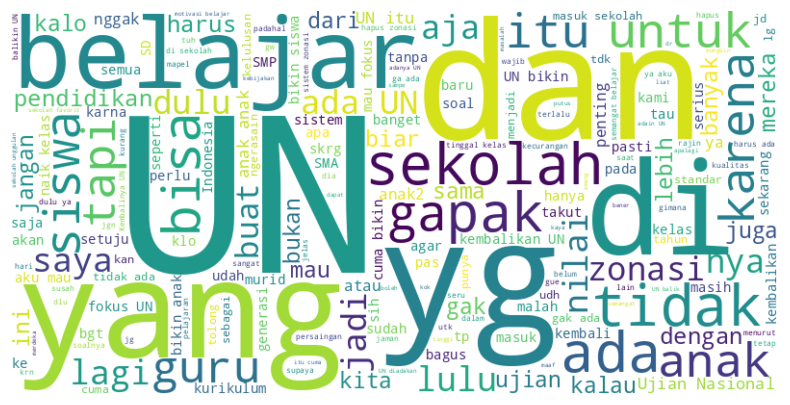

In [ ]:
# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import string

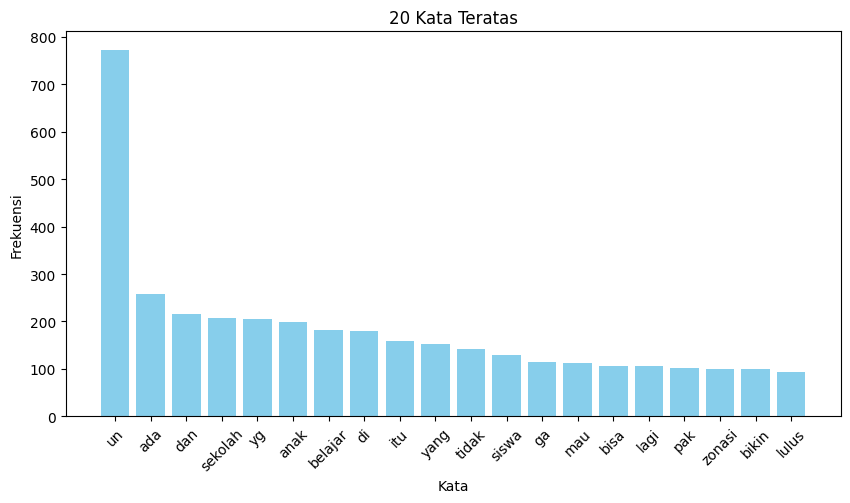

In [ ]:
# Gabungkan semua teks menjadi satu string
normalized_text = " ".join(dataex['text'].astype(str))  # Ganti 'text' dengan nama kolom Anda

# Bersihkan teks
cleaned_text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
cleaned_text = "".join([char for char in cleaned_text if not char.isdigit()])  # Hapus angka
cleaned_text = cleaned_text.lower()  # Ubah ke huruf kecil
cleaned_text = " ".join(cleaned_text.split())  # Hapus spasi berlebih

# Pisahkan teks menjadi kata-kata
all_words = cleaned_text.split()

# Hitung frekuensi kata
counter = Counter(all_words)
top_words = counter.most_common(20)

# Ekstrak kata dan frekuensi
words, counts = zip(*top_words)

# Plot grafik
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title("20 Kata Teratas")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.show()

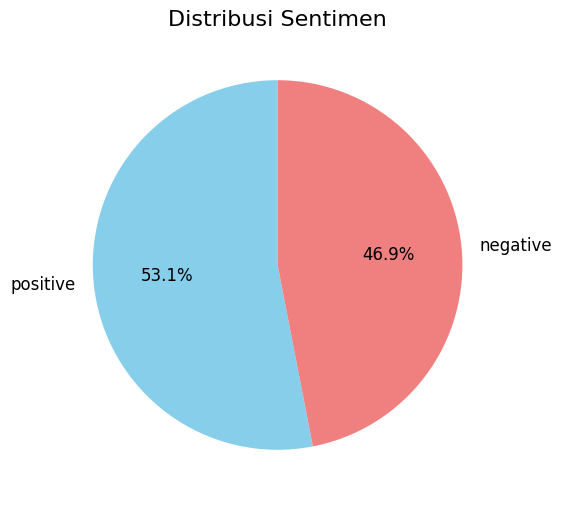

In [ ]:
plt.figure(figsize=(8, 6))
data_no_netral['fix_sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral', 'lightgreen'],
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Distribusi Sentimen', fontsize=16)
plt.ylabel('')  # Menghapus label y agar lebih bersih
plt.show()

#Preprocessing

In [ ]:
import re

def clean_text(text):
    # Hapus mention (@username)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Hapus hashtag (#hashtag)
    text = re.sub(r'#\w+', '', text)
    # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Ganti emoji dengan spasi
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Simbol & Pictogram
        "\U0001F680-\U0001F6FF"  # Transportasi & Simbol
        "\U0001F1E0-\U0001F1FF"  # Bendera negara
        "\U00002700-\U000027BF"  # Simbol tambahan
        "\U0001F900-\U0001F9FF"  # Ekspresi tambahan
        "\U00002600-\U000026FF"  # Simbol tambahan
        "\U00002B50-\U00002B55"
        "\U000024C2-\U0001F251"
        "]", flags=re.UNICODE
    )
    text = emoji_pattern.sub(' ', text)  # Ganti emoji dengan spasi

    # Hapus karakter non-alfabet selain spasi
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Menghapus spasi ganda yang mungkin muncul
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Terapkan fungsi ke kolom 'text'
dataex['cleaned_comment'] = dataex['text'].astype(str).apply(clean_text)
dataex

,username,text,english_text,fix_sentiment,cleaned_comment
0,mcblushgift,"Welcome back, UN 🔥","Welcome back, UN",positive,Welcome back UN
1,zonabolaindo_,"aku rindu ""kita break dulu ya, mau fokus UN""","I miss ""Let's take a break first, we want to f...",negative,aku rindu kita break dulu ya mau fokus UN
2,miekuahsatu,1. Kembalikan UN sebagai syarat lulus\r\n2. Ni...,1. Return the National Examination as a gradua...,negative,Kembalikan UN sebagai syarat lulus Nilai siswa...
3,fachmial,"UN penting, zonasi hapus, balikin lagi sekolah...","The National Examination is important, zoning ...",positive,UN penting zonasi hapus balikin lagi sekolah u...
4,vidiahaskye,Dulu tuh menjelang UN anak” pada serius belaja...,"In the past, before the National Examination, ...",negative,Dulu tuh menjelang UN anak pada serius belajar...
...,...,...,...,...,...
649,official_smalsar,"setuju, Diadakan kembali UN namun metode n tek...","agree, the UN will be held again but the metho...",positive,setuju Diadakan kembali UN namun metode n tekn...
650,galang12,"Ujian Nasional nggak bawa perubahan, cuma biki...",The National Examination doesn't bring any cha...,negative,Ujian Nasional nggak bawa perubahan cuma bikin...
651,angga.prw,Baliknya UN bikin suasana belajar makin nggak ...,"In return, the National Examination makes the ...",negative,Baliknya UN bikin suasana belajar makin nggak ...
652,imaismed,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,Just do it sir.. I'm a TEACHER and I need the ...,negative,Adain aja pak Saya GURU saya butuh UN siswa ka...


In [ ]:
#Case Folding (Mengubah Menjadi Huruf Kecil)

def case_folding(text):
    return text.lower()

dataex['casefold_comment'] = dataex['cleaned_comment'].apply(case_folding)
dataex[['cleaned_comment', 'casefold_comment']].head()

,cleaned_comment,casefold_comment
0,Welcome back UN,welcome back un
1,aku rindu kita break dulu ya mau fokus UN,aku rindu kita break dulu ya mau fokus un
2,Kembalikan UN sebagai syarat lulus Nilai siswa...,kembalikan un sebagai syarat lulus nilai siswa...
3,UN penting zonasi hapus balikin lagi sekolah u...,un penting zonasi hapus balikin lagi sekolah u...
4,Dulu tuh menjelang UN anak pada serius belajar...,dulu tuh menjelang un anak pada serius belajar...


In [ ]:
import pandas as pd

# Fungsi untuk normalisasi teks menggunakan kamus alay
def normalize_text(text, normalization_dict):
    # Pastikan teks dipecah menjadi token
    casefold_comment = text.split()
    # Normalisasi setiap token dalam list token
    normalized_words = [normalization_dict.get(word, word) for word in casefold_comment]
    return ' '.join(normalized_words)

# Muat kamus alay dan bersihkan spasi tambahan
kamus_path = '/content/drive/MyDrive/Dataset/kamusalay.csv'
kamus_id = pd.read_csv(kamus_path, usecols=["slang", "formal"])
kamus_id['slang'] = kamus_id['slang'].str.strip().str.lower()
kamus_id['formal'] = kamus_id['formal'].str.strip().str.lower()
normalization_dict_id = dict(zip(kamus_id['slang'], kamus_id['formal']))

# Terapkan fungsi normalisasi ke kolom casefold_comment
dataex['normalized_text'] = dataex['casefold_comment'].apply(lambda x: normalize_text(x.lower(), normalization_dict_id))

# Menampilkan DataFrame dengan teks yang sudah dinormalisasi
dataex[['casefold_comment', 'normalized_text']]

,casefold_comment,normalized_text
0,welcome back un,welcome back un
1,aku rindu kita break dulu ya mau fokus un,aku rindu kita break dulu ya mau fokus un
2,kembalikan un sebagai syarat lulus nilai siswa...,kembalikan un sebagai syarat lulus nilai siswa...
3,un penting zonasi hapus balikin lagi sekolah u...,un penting zonasi hapus balikin lagi sekolah u...
4,dulu tuh menjelang un anak pada serius belajar...,dulu tuh menjelang un anak pada serius belajar...
...,...,...
649,setuju diadakan kembali un namun metode n tekn...,setuju diadakan kembali un namun metode n tekn...
650,ujian nasional nggak bawa perubahan cuma bikin...,ujian nasional enggak bawa perubahan cuma biki...
651,baliknya un bikin suasana belajar makin nggak ...,baliknya un bikin suasana belajar makin enggak...
652,adain aja pak saya guru saya butuh un siswa ka...,mengadakan saja pak saya guru saya butuh un si...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install Sastrawi nltk

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Inisialisasi daftar stopwords dari Sastrawi
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())

# Fungsi untuk menghapus stopwords dari teks
def remove_stopwords(text, stopwords):
    # Pastikan teks menjadi lowercase untuk konsistensi perbandingan
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

# Terapkan fungsi ke kolom 'normalized_text'
dataex['filtered_text'] = dataex['normalized_text'].apply(lambda x: remove_stopwords(x, stopwords))

# Menampilkan hasil
dataex[['normalized_text', 'filtered_text']]

,normalized_text,filtered_text
0,welcome back un,welcome back un
1,aku rindu kita break dulu ya mau fokus un,aku rindu break dulu mau fokus un
2,kembalikan un sebagai syarat lulus nilai siswa...,kembalikan un syarat lulus nilai siswa jangan ...
3,un penting zonasi hapus balikin lagi sekolah u...,un penting zonasi hapus balikin sekolah unggul...
4,dulu tuh menjelang un anak pada serius belajar...,dulu tuh menjelang un anak serius belajar biar...
...,...,...
649,setuju diadakan kembali un namun metode n tekn...,setuju diadakan un metode n teknis pelaksanaan...
650,ujian nasional enggak bawa perubahan cuma biki...,ujian nasional enggak bawa perubahan cuma biki...
651,baliknya un bikin suasana belajar makin enggak...,baliknya un bikin suasana belajar makin enggak...
652,mengadakan saja pak saya guru saya butuh un si...,mengadakan pak guru butuh un siswa peduli nila...


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi Stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada teks
def stem_text(text):
    words = text.split()  # Pisahkan teks menjadi kata-kata
    stemmed_words = [stemmer.stem(word) for word in words]  # Lakukan stemming pada setiap kata
    return ' '.join(stemmed_words)  # Gabungkan kembali menjadi teks

# Terapkan fungsi stemming ke kolom 'filtered_text'
dataex['stemmed_comment'] = dataex['filtered_text'].apply(stem_text)

# Menampilkan hasil
dataex[['filtered_text', 'stemmed_comment']]

,filtered_text,stemmed_comment
0,welcome back un,welcome back un
1,aku rindu break dulu mau fokus un,aku rindu break dulu mau fokus un
2,kembalikan un syarat lulus nilai siswa jangan ...,kembali un syarat lulus nilai siswa jangan up ...
3,un penting zonasi hapus balikin sekolah unggul...,un penting zonasi hapus balikin sekolah unggul...
4,dulu tuh menjelang un anak serius belajar biar...,dulu tuh jelang un anak serius ajar biar lulus...
...,...,...
649,setuju diadakan un metode n teknis pelaksanaan...,tuju ada un metode n teknis laksana lebih baik...
650,ujian nasional enggak bawa perubahan cuma biki...,uji nasional enggak bawa ubah cuma bikin stres...
651,baliknya un bikin suasana belajar makin enggak...,balik un bikin suasana ajar makin enggak nyaman
652,mengadakan pak guru butuh un siswa peduli nila...,ada pak guru butuh un siswa peduli nilai yakin...


In [ ]:
# Tokenisasi (Memecah Teks Menjadi Token/Kata-Kata Terpisah)
def tokenize_text(text):
    return text.split()

dataex['tokenized_comment'] = dataex['stemmed_comment'].apply(tokenize_text)
dataex[['stemmed_comment', 'tokenized_comment']]

,stemmed_comment,tokenized_comment
0,welcome back un,"[welcome, back, un]"
1,aku rindu break dulu mau fokus un,"[aku, rindu, break, dulu, mau, fokus, un]"
2,kembali un syarat lulus nilai siswa jangan up ...,"[kembali, un, syarat, lulus, nilai, siswa, jan..."
3,un penting zonasi hapus balikin sekolah unggul...,"[un, penting, zonasi, hapus, balikin, sekolah,..."
4,dulu tuh jelang un anak serius ajar biar lulus...,"[dulu, tuh, jelang, un, anak, serius, ajar, bi..."
...,...,...
649,tuju ada un metode n teknis laksana lebih baik...,"[tuju, ada, un, metode, n, teknis, laksana, le..."
650,uji nasional enggak bawa ubah cuma bikin stres...,"[uji, nasional, enggak, bawa, ubah, cuma, biki..."
651,balik un bikin suasana ajar makin enggak nyaman,"[balik, un, bikin, suasana, ajar, makin, engga..."
652,ada pak guru butuh un siswa peduli nilai yakin...,"[ada, pak, guru, butuh, un, siswa, peduli, nil..."


In [ ]:
dataex.to_csv('/content/drive/MyDrive/Dataset/praproses_data.csv', index=False)

#Resampling & Splitting

In [ ]:
import pandas as pd

In [ ]:
# dataex = pd.read_csv('/content/drive/MyDrive/Dataset/praproses_data.csv')

In [ ]:
# Membuat dataframe baru hanya dengan 4 kolom yang diinginkan
df_normal = dataex[['username', 'text', 'tokenized_comment', 'fix_sentiment']]

# Mengganti nama kolom 'stemmed_comment' menjadi 'praproses'
df_normal = df_normal.rename(columns={'tokenized_comment': 'praproses'})

# Menampilkan hasil dataframe
df_normal

,username,text,praproses,fix_sentiment
0,mcblushgift,"Welcome back, UN 🔥","[welcome, back, un]",positive
1,zonabolaindo_,"aku rindu ""kita break dulu ya, mau fokus UN""","[aku, rindu, break, dulu, mau, fokus, un]",negative
2,miekuahsatu,1. Kembalikan UN sebagai syarat lulus\r\n2. Ni...,"[kembali, un, syarat, lulus, nilai, siswa, jan...",negative
3,fachmial,"UN penting, zonasi hapus, balikin lagi sekolah...","[un, penting, zonasi, hapus, balikin, sekolah,...",positive
4,vidiahaskye,Dulu tuh menjelang UN anak” pada serius belaja...,"[dulu, tuh, jelang, un, anak, serius, ajar, bi...",negative
...,...,...,...,...
649,official_smalsar,"setuju, Diadakan kembali UN namun metode n tek...","[tuju, ada, un, metode, n, teknis, laksana, le...",positive
650,galang12,"Ujian Nasional nggak bawa perubahan, cuma biki...","[uji, nasional, enggak, bawa, ubah, cuma, biki...",negative
651,angga.prw,Baliknya UN bikin suasana belajar makin nggak ...,"[balik, un, bikin, suasana, ajar, makin, engga...",negative
652,imaismed,Adain aja pak.. Saya GURU saya butuh UN.. sisw...,"[ada, pak, guru, butuh, un, siswa, peduli, nil...",negative


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# =======================================================
# SPLITTING DATA
# =======================================================
# Split data menjadi train_data (80%) dan test_data (20%)
train_data_80, test_data_20 = train_test_split(
    df_normal, test_size=0.2, random_state=42, stratify=df_normal['fix_sentiment']
)

# Split data menjadi train_data (70%) dan test_data (30%)
train_data_70, test_data_30 = train_test_split(
    df_normal, test_size=0.3, random_state=42, stratify=df_normal['fix_sentiment']
)

# =======================================================
# RESAMPLING
# =======================================================
# 1. Resampling untuk 80:20 SPLIT
# Random Under Sampling (RUS)
rus_80 = RandomUnderSampler(random_state=42)
train_features_rus_80, train_labels_rus_80 = rus_80.fit_resample(
    train_data_80[['praproses']], train_data_80['fix_sentiment']
)

# Random Over Sampling (ROS)
ros_80 = RandomOverSampler(random_state=42)
train_features_ros_80, train_labels_ros_80 = ros_80.fit_resample(
    train_data_80[['praproses']], train_data_80['fix_sentiment']
)

# 2. Resampling untuk 70:30 SPLIT
# Random Under Sampling (RUS)
rus_70 = RandomUnderSampler(random_state=42)
train_features_rus_70, train_labels_rus_70 = rus_70.fit_resample(
    train_data_70[['praproses']], train_data_70['fix_sentiment']
)

# Random Over Sampling (ROS)
ros_70 = RandomOverSampler(random_state=42)
train_features_ros_70, train_labels_ros_70 = ros_70.fit_resample(
    train_data_70[['praproses']], train_data_70['fix_sentiment']
)

# =======================================================
# MENAMPILKAN HASIL
# =======================================================
print("Splitting 80:20:")
print(f"Train Data Shape (80%): {train_data_80.shape}")
print(f"Test Data Shape (20%): {test_data_20.shape}")
print(f"Train Features RUS Shape (80:20): {train_features_rus_80.shape}")
print(f"Train Labels RUS Shape (80:20): {train_labels_rus_80.shape}")
print(f"Train Features ROS Shape (80:20): {train_features_ros_80.shape}")
print(f"Train Labels ROS Shape (80:20): {train_labels_ros_80.shape}")

print("\nSplitting 70:30:")
print(f"Train Data Shape (70%): {train_data_70.shape}")
print(f"Test Data Shape (30%): {test_data_30.shape}")
print(f"Train Features RUS Shape (70:30): {train_features_rus_70.shape}")
print(f"Train Labels RUS Shape (70:30): {train_labels_rus_70.shape}")
print(f"Train Features ROS Shape (70:30): {train_features_ros_70.shape}")
print(f"Train Labels ROS Shape (70:30): {train_labels_ros_70.shape}")

Splitting 80:20:
Train Data Shape (80%): (523, 4)
Test Data Shape (20%): (131, 4)
Train Features RUS Shape (80:20): (492, 1)
Train Labels RUS Shape (80:20): (492,)
Train Features ROS Shape (80:20): (554, 1)
Train Labels ROS Shape (80:20): (554,)

Splitting 70:30:
Train Data Shape (70%): (457, 4)
Test Data Shape (30%): (197, 4)
Train Features RUS Shape (70:30): (430, 1)
Train Labels RUS Shape (70:30): (430,)
Train Features ROS Shape (70:30): (484, 1)
Train Labels ROS Shape (70:30): (484,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base

# Ekstraksi Fitur

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# =======================================================
# PERBAIKAN DATA: KONVERSI KOLOM 'praproses' MENJADI STRING
# =======================================================

# Fungsi untuk memastikan kolom 'praproses' berupa string
def convert_to_string(dataframe, column_name):
    dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
    return dataframe

# Konversi kolom 'praproses' untuk semua data yang digunakan
train_data_80 = convert_to_string(train_data_80, 'praproses')
test_data_20 = convert_to_string(test_data_20, 'praproses')

train_data_70 = convert_to_string(train_data_70, 'praproses')
test_data_30 = convert_to_string(test_data_30, 'praproses')

train_features_rus_80 = convert_to_string(train_features_rus_80, 'praproses')
train_features_rus_70 = convert_to_string(train_features_rus_70, 'praproses')

train_features_ros_80 = convert_to_string(train_features_ros_80, 'praproses')
train_features_ros_70 = convert_to_string(train_features_ros_70, 'praproses')

# =======================================================
# TF-IDF untuk NORMAL DATA
# =======================================================

# 1. Normal Data (80:20 Split)
tfidf_vectorizer_normal_80 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_normal_80 = tfidf_vectorizer_normal_80.fit_transform(train_data_80['praproses'])
tfidf_features_test_normal_80 = tfidf_vectorizer_normal_80.transform(test_data_20['praproses'])

# 2. Normal Data (70:30 Split)
tfidf_vectorizer_normal_70 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_normal_70 = tfidf_vectorizer_normal_70.fit_transform(train_data_70['praproses'])
tfidf_features_test_normal_70 = tfidf_vectorizer_normal_70.transform(test_data_30['praproses'])

# =======================================================
# TF-IDF untuk RANDOM UNDER SAMPLING (RUS)
# =======================================================

# 3. RUS Data (80:20 Split)
tfidf_vectorizer_rus_80 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_rus_80 = tfidf_vectorizer_rus_80.fit_transform(train_features_rus_80['praproses'])
tfidf_features_test_rus_80 = tfidf_vectorizer_rus_80.transform(test_data_20['praproses'])

# 4. RUS Data (70:30 Split)
tfidf_vectorizer_rus_70 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_rus_70 = tfidf_vectorizer_rus_70.fit_transform(train_features_rus_70['praproses'])
tfidf_features_test_rus_70 = tfidf_vectorizer_rus_70.transform(test_data_30['praproses'])

# =======================================================
# TF-IDF untuk RANDOM OVER SAMPLING (ROS)
# =======================================================

# 5. ROS Data (80:20 Split)
tfidf_vectorizer_ros_80 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_ros_80 = tfidf_vectorizer_ros_80.fit_transform(train_features_ros_80['praproses'])
tfidf_features_test_ros_80 = tfidf_vectorizer_ros_80.transform(test_data_20['praproses'])

# 6. ROS Data (70:30 Split)
tfidf_vectorizer_ros_70 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_ros_70 = tfidf_vectorizer_ros_70.fit_transform(train_features_ros_70['praproses'])
tfidf_features_test_ros_70 = tfidf_vectorizer_ros_70.transform(test_data_30['praproses'])

# =======================================================
# MENAMPILKAN INFORMASI
# =======================================================
print("TF-IDF Feature Extraction Complete.")
print(f"Normal 80:20 - Train Features: {tfidf_features_normal_80.shape}, Test Features: {tfidf_features_test_normal_80.shape}")
print(f"Normal 70:30 - Train Features: {tfidf_features_normal_70.shape}, Test Features: {tfidf_features_test_normal_70.shape}")
print(f"RUS 80:20 - Train Features: {tfidf_features_rus_80.shape}, Test Features: {tfidf_features_test_rus_80.shape}")
print(f"RUS 70:30 - Train Features: {tfidf_features_rus_70.shape}, Test Features: {tfidf_features_test_rus_70.shape}")
print(f"ROS 80:20 - Train Features: {tfidf_features_ros_80.shape}, Test Features: {tfidf_features_test_ros_80.shape}")
print(f"ROS 70:30 - Train Features: {tfidf_features_ros_70.shape}, Test Features: {tfidf_features_test_ros_70.shape}")

TF-IDF Feature Extraction Complete.
Normal 80:20 - Train Features: (523, 8252), Test Features: (131, 8252)
Normal 70:30 - Train Features: (457, 7455), Test Features: (197, 7455)
RUS 80:20 - Train Features: (492, 7851), Test Features: (131, 7851)
RUS 70:30 - Train Features: (430, 7191), Test Features: (197, 7191)
ROS 80:20 - Train Features: (554, 8252), Test Features: (131, 8252)
ROS 70:30 - Train Features: (484, 7455), Test Features: (197, 7455)


# Modelling

## --- Logistic Regression ---

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression for Normal Data (80:20 Split)
lr_model_normal_80 = LogisticRegression(random_state=42)
lr_model_normal_80.fit(tfidf_features_normal_80, train_data_80['fix_sentiment'])

# Predict on test data
lr_predictions_normal_80 = lr_model_normal_80.predict(tfidf_features_test_normal_80)

# Evaluate
print("Logistic Regression - Normal 80:20 Split")
print(classification_report(test_data_20['fix_sentiment'], lr_predictions_normal_80))

Logistic Regression - Normal 80:20 Split
              precision    recall  f1-score   support

    negative       0.81      0.48      0.60        61
    positive       0.66      0.90      0.76        70

    accuracy                           0.70       131
   macro avg       0.73      0.69      0.68       131
weighted avg       0.73      0.70      0.69       131



In [ ]:
# Logistic Regression for Normal Data (70:30 Split)
lr_model_normal_70 = LogisticRegression(random_state=42)
lr_model_normal_70.fit(tfidf_features_normal_70, train_data_70['fix_sentiment'])

# Predict on test data
lr_predictions_normal_70 = lr_model_normal_70.predict(tfidf_features_test_normal_70)

# Evaluate
print("Logistic Regression - Normal 70:30 Split")
print(classification_report(test_data_30['fix_sentiment'], lr_predictions_normal_70))

Logistic Regression - Normal 70:30 Split
              precision    recall  f1-score   support

    negative       0.74      0.53      0.62        92
    positive       0.67      0.84      0.75       105

    accuracy                           0.70       197
   macro avg       0.71      0.69      0.68       197
weighted avg       0.70      0.70      0.69       197



In [ ]:
# Logistic Regression for RUS Data (80:20 Split)
lr_model_rus_80 = LogisticRegression(random_state=42)
lr_model_rus_80.fit(tfidf_features_rus_80, train_labels_rus_80)

# Predict on test data
lr_predictions_rus_80 = lr_model_rus_80.predict(tfidf_features_test_rus_80)

# Evaluate
print("Logistic Regression - RUS 80:20 Split")
print(classification_report(test_data_20['fix_sentiment'], lr_predictions_rus_80))

Logistic Regression - RUS 80:20 Split
              precision    recall  f1-score   support

    negative       0.70      0.61      0.65        61
    positive       0.69      0.77      0.73        70

    accuracy                           0.69       131
   macro avg       0.70      0.69      0.69       131
weighted avg       0.70      0.69      0.69       131



In [ ]:
# Logistic Regression for RUS Data (70:30 Split)
lr_model_rus_70 = LogisticRegression(random_state=42)
lr_model_rus_70.fit(tfidf_features_rus_70, train_labels_rus_70)

# Predict on test data
lr_predictions_rus_70 = lr_model_rus_70.predict(tfidf_features_test_rus_70)

# Evaluate
print("Logistic Regression - RUS 70:30 Split")
print(classification_report(test_data_30['fix_sentiment'], lr_predictions_rus_70))

Logistic Regression - RUS 70:30 Split
              precision    recall  f1-score   support

    negative       0.70      0.65      0.67        92
    positive       0.71      0.75      0.73       105

    accuracy                           0.71       197
   macro avg       0.70      0.70      0.70       197
weighted avg       0.71      0.71      0.70       197



In [ ]:
# Logistic Regression for ROS Data (80:20 Split)
lr_model_ros_80 = LogisticRegression(random_state=42)
lr_model_ros_80.fit(tfidf_features_ros_80, train_labels_ros_80)

# Predict on test data
lr_predictions_ros_80 = lr_model_ros_80.predict(tfidf_features_test_ros_80)

# Evaluate
print("Logistic Regression - ROS 80:20 Split")
print(classification_report(test_data_20['fix_sentiment'], lr_predictions_ros_80))

Logistic Regression - ROS 80:20 Split
              precision    recall  f1-score   support

    negative       0.73      0.61      0.66        61
    positive       0.70      0.80      0.75        70

    accuracy                           0.71       131
   macro avg       0.71      0.70      0.70       131
weighted avg       0.71      0.71      0.71       131



In [ ]:
# Logistic Regression for ROS Data (70:30 Split)
lr_model_ros_70 = LogisticRegression(random_state=42)
lr_model_ros_70.fit(tfidf_features_ros_70, train_labels_ros_70)

# Predict on test data
lr_predictions_ros_70 = lr_model_ros_70.predict(tfidf_features_test_ros_70)

# Evaluate
print("Logistic Regression - ROS 70:30 Split")
print(classification_report(test_data_30['fix_sentiment'], lr_predictions_ros_70))

Logistic Regression - ROS 70:30 Split
              precision    recall  f1-score   support

    negative       0.71      0.63      0.67        92
    positive       0.70      0.77      0.74       105

    accuracy                           0.71       197
   macro avg       0.71      0.70      0.70       197
weighted avg       0.71      0.71      0.70       197



## --- Naive Bayes ---

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes for Normal Data (80:20 Split)
nb_model_normal_80 = MultinomialNB()
nb_model_normal_80.fit(tfidf_features_normal_80, train_data_80['fix_sentiment'])

# Predict on test data
nb_predictions_normal_80 = nb_model_normal_80.predict(tfidf_features_test_normal_80)

# Evaluate
print("Naive Bayes - Normal 80:20 Split")
print(classification_report(test_data_20['fix_sentiment'], nb_predictions_normal_80))

Naive Bayes - Normal 80:20 Split
              precision    recall  f1-score   support

    negative       0.78      0.48      0.59        61
    positive       0.66      0.89      0.76        70

    accuracy                           0.69       131
   macro avg       0.72      0.68      0.67       131
weighted avg       0.72      0.69      0.68       131



In [ ]:
# Naive Bayes for Normal Data (70:30 Split)
nb_model_normal_70 = MultinomialNB()
nb_model_normal_70.fit(tfidf_features_normal_70, train_data_70['fix_sentiment'])

# Predict on test data
nb_predictions_normal_70 = nb_model_normal_70.predict(tfidf_features_test_normal_70)

# Evaluate
print("Naive Bayes - Normal 70:30 Split")
print(classification_report(test_data_30['fix_sentiment'], nb_predictions_normal_70))

Naive Bayes - Normal 70:30 Split
              precision    recall  f1-score   support

    negative       0.69      0.54      0.61        92
    positive       0.66      0.79      0.72       105

    accuracy                           0.68       197
   macro avg       0.68      0.67      0.67       197
weighted avg       0.68      0.68      0.67       197



In [ ]:
# Naive Bayes for RUS Data (80:20 Split)
nb_model_rus_80 = MultinomialNB()
nb_model_rus_80.fit(tfidf_features_rus_80, train_labels_rus_80)

# Predict on test data
nb_predictions_rus_80 = nb_model_rus_80.predict(tfidf_features_test_rus_80)

# Evaluate
print("Naive Bayes - RUS 80:20 Split")
print(classification_report(test_data_20['fix_sentiment'], nb_predictions_rus_80))

Naive Bayes - RUS 80:20 Split
              precision    recall  f1-score   support

    negative       0.68      0.72      0.70        61
    positive       0.74      0.70      0.72        70

    accuracy                           0.71       131
   macro avg       0.71      0.71      0.71       131
weighted avg       0.71      0.71      0.71       131



In [ ]:
# Naive Bayes for RUS Data (70:30 Split)
nb_model_rus_70 = MultinomialNB()
nb_model_rus_70.fit(tfidf_features_rus_70, train_labels_rus_70)

# Predict on test data
nb_predictions_rus_70 = nb_model_rus_70.predict(tfidf_features_test_rus_70)

# Evaluate
print("Naive Bayes - RUS 70:30 Split")
print(classification_report(test_data_30['fix_sentiment'], nb_predictions_rus_70))

Naive Bayes - RUS 70:30 Split
              precision    recall  f1-score   support

    negative       0.64      0.71      0.67        92
    positive       0.72      0.66      0.69       105

    accuracy                           0.68       197
   macro avg       0.68      0.68      0.68       197
weighted avg       0.68      0.68      0.68       197



In [ ]:
# Naive Bayes for ROS Data (80:20 Split)
nb_model_ros_80 = MultinomialNB()
nb_model_ros_80.fit(tfidf_features_ros_80, train_labels_ros_80)

# Predict on test data
nb_predictions_ros_80 = nb_model_ros_80.predict(tfidf_features_test_ros_80)

# Evaluate
print("Naive Bayes - ROS 80:20 Split")
print(classification_report(test_data_20['fix_sentiment'], nb_predictions_ros_80))

Naive Bayes - ROS 80:20 Split
              precision    recall  f1-score   support

    negative       0.67      0.75      0.71        61
    positive       0.76      0.67      0.71        70

    accuracy                           0.71       131
   macro avg       0.71      0.71      0.71       131
weighted avg       0.72      0.71      0.71       131



In [ ]:
# Naive Bayes for ROS Data (70:30 Split)
nb_model_ros_70 = MultinomialNB()
nb_model_ros_70.fit(tfidf_features_ros_70, train_labels_ros_70)

# Predict on test data
nb_predictions_ros_70 = nb_model_ros_70.predict(tfidf_features_test_ros_70)

# Evaluate
print("Naive Bayes - ROS 70:30 Split")
print(classification_report(test_data_30['fix_sentiment'], nb_predictions_ros_70))

Naive Bayes - ROS 70:30 Split
              precision    recall  f1-score   support

    negative       0.66      0.71      0.68        92
    positive       0.72      0.68      0.70       105

    accuracy                           0.69       197
   macro avg       0.69      0.69      0.69       197
weighted avg       0.69      0.69      0.69       197



## --- Support Vector Machine ---

In [ ]:
from sklearn.svm import LinearSVC

# SVM for Normal Data (80:20 Split)
svm_model_normal_80 = LinearSVC(random_state=42)
svm_model_normal_80.fit(tfidf_features_normal_80, train_data_80['fix_sentiment'])

# Predict on test data
svm_predictions_normal_80 = svm_model_normal_80.predict(tfidf_features_test_normal_80)

# Evaluate
print("SVM - Normal 80:20 Split")
print(classification_report(test_data_20['fix_sentiment'], svm_predictions_normal_80))
print(accuracy_score(test_data_20['fix_sentiment'], svm_predictions_normal_80))

SVM - Normal 80:20 Split
              precision    recall  f1-score   support

    negative       0.77      0.66      0.71        61
    positive       0.73      0.83      0.78        70

    accuracy                           0.75       131
   macro avg       0.75      0.74      0.74       131
weighted avg       0.75      0.75      0.75       131

0.7480916030534351


In [ ]:
# SVM for Normal Data (70:30 Split)
svm_model_normal_70 = LinearSVC(random_state=42)
svm_model_normal_70.fit(tfidf_features_normal_70, train_data_70['fix_sentiment'])

# Predict on test data
svm_predictions_normal_70 = svm_model_normal_70.predict(tfidf_features_test_normal_70)

# Evaluate
print("SVM - Normal 70:30 Split")
print(classification_report(test_data_30['fix_sentiment'], svm_predictions_normal_70))

SVM - Normal 70:30 Split
              precision    recall  f1-score   support

    negative       0.73      0.70      0.71        92
    positive       0.74      0.77      0.76       105

    accuracy                           0.74       197
   macro avg       0.74      0.73      0.73       197
weighted avg       0.74      0.74      0.74       197



In [ ]:
# SVM for RUS Data (80:20 Split)
svm_model_rus_80 = LinearSVC(random_state=42)
svm_model_rus_80.fit(tfidf_features_rus_80, train_labels_rus_80)

# Predict on test data
svm_predictions_rus_80 = svm_model_rus_80.predict(tfidf_features_test_rus_80)

# Evaluate
print("SVM - RUS 80:20 Split")
print(classification_report(test_data_20['fix_sentiment'], svm_predictions_rus_80))

SVM - RUS 80:20 Split
              precision    recall  f1-score   support

    negative       0.72      0.75      0.74        61
    positive       0.78      0.74      0.76        70

    accuracy                           0.75       131
   macro avg       0.75      0.75      0.75       131
weighted avg       0.75      0.75      0.75       131



In [ ]:
# SVM for RUS Data (70:30 Split)
svm_model_rus_70 = LinearSVC(random_state=42)
svm_model_rus_70.fit(tfidf_features_rus_70, train_labels_rus_70)

# Predict on test data
svm_predictions_rus_70 = svm_model_rus_70.predict(tfidf_features_test_rus_70)

# Evaluate
print("SVM - RUS 70:30 Split")
print(classification_report(test_data_30['fix_sentiment'], svm_predictions_rus_70))

SVM - RUS 70:30 Split
              precision    recall  f1-score   support

    negative       0.65      0.72      0.68        92
    positive       0.73      0.67      0.70       105

    accuracy                           0.69       197
   macro avg       0.69      0.69      0.69       197
weighted avg       0.69      0.69      0.69       197



In [ ]:
# SVM for ROS Data (80:20 Split)
svm_model_ros_80 = LinearSVC(random_state=42)
svm_model_ros_80.fit(tfidf_features_ros_80, train_labels_ros_80)

# Predict on test data
svm_predictions_ros_80 = svm_model_ros_80.predict(tfidf_features_test_ros_80)

# Evaluate
print("SVM - ROS 80:20 Split")
print(classification_report(test_data_20['fix_sentiment'], svm_predictions_ros_80))
print(accuracy_score(test_data_20['fix_sentiment'], svm_predictions_ros_80))

SVM - ROS 80:20 Split
              precision    recall  f1-score   support

    negative       0.77      0.70      0.74        61
    positive       0.76      0.81      0.79        70

    accuracy                           0.76       131
   macro avg       0.76      0.76      0.76       131
weighted avg       0.76      0.76      0.76       131

0.7633587786259542


In [ ]:
# SVM for ROS Data (70:30 Split)
svm_model_ros_70 = LinearSVC(random_state=42)
svm_model_ros_70.fit(tfidf_features_ros_70, train_labels_ros_70)

# Predict on test data
svm_predictions_ros_70 = svm_model_ros_70.predict(tfidf_features_test_ros_70)

# Evaluate
print("SVM - ROS 70:30 Split")
print(classification_report(test_data_30['fix_sentiment'], svm_predictions_ros_70))

SVM - ROS 70:30 Split
              precision    recall  f1-score   support

    negative       0.72      0.71      0.71        92
    positive       0.75      0.76      0.75       105

    accuracy                           0.74       197
   macro avg       0.73      0.73      0.73       197
weighted avg       0.74      0.74      0.74       197



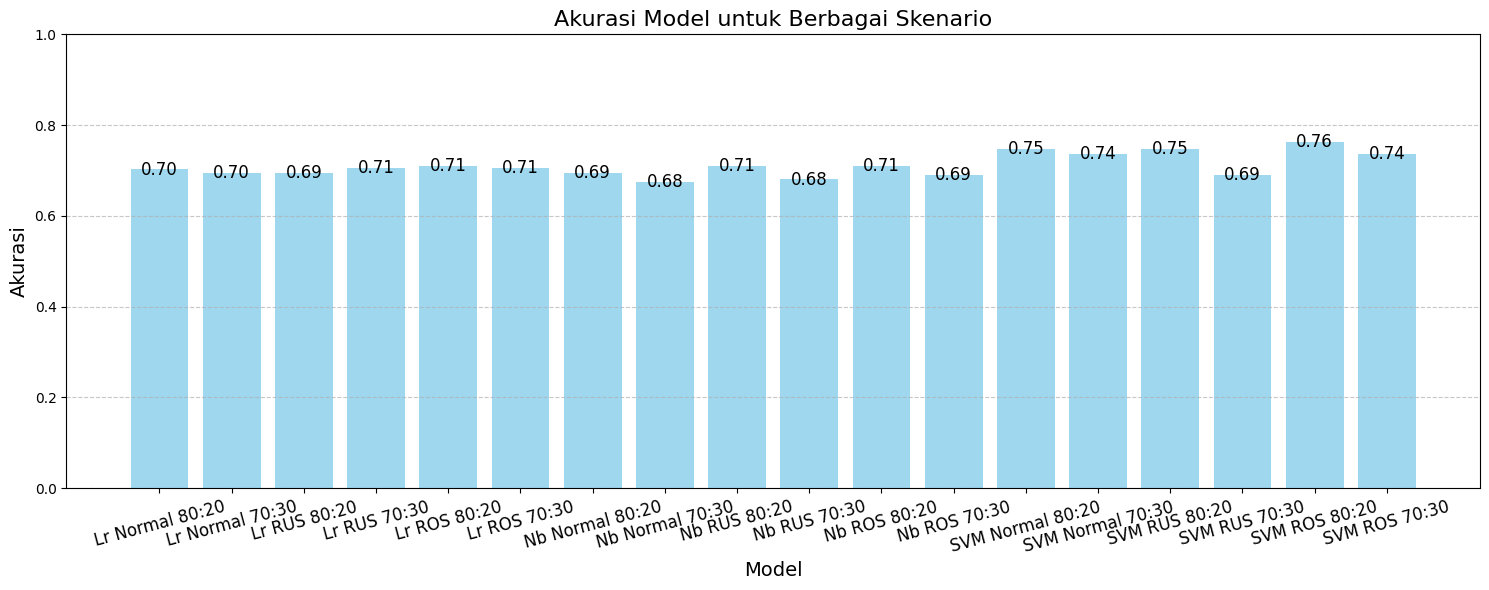

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Hasil akurasi dari setiap skenario (gantikan nilai dengan hasil sebenarnya)
accuracy_scores = {
    "Lr Normal 80:20": accuracy_score(test_data_20['fix_sentiment'], lr_predictions_normal_80),
    "Lr Normal 70:30": accuracy_score(test_data_30['fix_sentiment'], lr_predictions_normal_70),
    "Lr RUS 80:20": accuracy_score(test_data_20['fix_sentiment'], lr_predictions_rus_80),
    "Lr RUS 70:30": accuracy_score(test_data_30['fix_sentiment'], lr_predictions_rus_70),
    "Lr ROS 80:20": accuracy_score(test_data_20['fix_sentiment'], lr_predictions_ros_80),
    "Lr ROS 70:30": accuracy_score(test_data_30['fix_sentiment'], lr_predictions_ros_70),
    "Nb Normal 80:20": accuracy_score(test_data_20['fix_sentiment'], nb_predictions_normal_80),
    "Nb Normal 70:30": accuracy_score(test_data_30['fix_sentiment'], nb_predictions_normal_70),
    "Nb RUS 80:20": accuracy_score(test_data_20['fix_sentiment'], nb_predictions_rus_80),
    "Nb RUS 70:30": accuracy_score(test_data_30['fix_sentiment'], nb_predictions_rus_70),
    "Nb ROS 80:20": accuracy_score(test_data_20['fix_sentiment'], nb_predictions_ros_80),
    "Nb ROS 70:30": accuracy_score(test_data_30['fix_sentiment'], nb_predictions_ros_70),
    "SVM Normal 80:20": accuracy_score(test_data_20['fix_sentiment'], svm_predictions_normal_80),
    "SVM Normal 70:30": accuracy_score(test_data_30['fix_sentiment'], svm_predictions_normal_70),
    "SVM RUS 80:20": accuracy_score(test_data_20['fix_sentiment'], svm_predictions_rus_80),
    "SVM RUS 70:30": accuracy_score(test_data_30['fix_sentiment'], svm_predictions_rus_70),
    "SVM ROS 80:20": accuracy_score(test_data_20['fix_sentiment'], svm_predictions_ros_80),
    "SVM ROS 70:30": accuracy_score(test_data_30['fix_sentiment'], svm_predictions_ros_70),
}

# Membuat plot
labels = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(15, 6))
bars = plt.bar(labels, accuracies, color='skyblue', alpha=0.8)

# Menampilkan nilai akurasi di atas tiap batang
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02,
             f"{accuracy:.2f}", ha='center', va='bottom', fontsize=12)

# Menambahkan detail plot
plt.title("Akurasi Model untuk Berbagai Skenario", fontsize=16)
plt.ylabel("Akurasi", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.ylim(0, 1)  # Rentang akurasi antara 0 dan 1
plt.xticks(rotation=15, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


#Pickle

In [ ]:
import pickle

# Simpan TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf_vectorizer_normal_80, tfidf_file)

# Simpan Model SVM
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model_normal_80, model_file)

print("TF-IDF vectorizer dan model SVM berhasil disimpan.")

TF-IDF vectorizer dan model SVM berhasil disimpan.


In [ ]:
# Load TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as tfidf_file:
    tfidf_vectorizer = pickle.load(tfidf_file)

# Load Model SVM
with open('svm_model.pkl', 'rb') as model_file:
    svm_model = pickle.load(model_file)

print("TF-IDF vectorizer dan model SVM berhasil dimuat.")

# Contoh Prediksi
text_input = ["Produk ini sangat bagus dan saya suka!"]

# Transformasi teks dengan TF-IDF
text_features = tfidf_vectorizer.transform(text_input)

# Prediksi sentimen
sentiment_prediction = svm_model.predict(text_features)
print(f"Sentimen: {sentiment_prediction[0]}")

TF-IDF vectorizer dan model SVM berhasil dimuat.
Sentimen: positive


# Streamlite

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import re
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Load pickle files (TF-IDF vectorizer dan model SVM)
with open('tfidf_vectorizer.pkl', 'rb') as tfidf_file:
    tfidf_vectorizer = pickle.load(tfidf_file)

with open('svm_model.pkl', 'rb') as model_file:
    svm_model = pickle.load(model_file)

# Load stopwords dan stemmer
stopword_factory = StopWordRemoverFactory()
stopwords = set(stopword_factory.get_stop_words())
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Function for preprocessing text
def preprocess_text(text):
    # Hapus mention, hashtag, URL, dan emoji
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Hapus mention
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Hapus URL
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002700-\U000027BF"
        "\U0001F900-\U0001F9FF"
        "\U00002600-\U000026FF"
        "\U00002B50-\U00002B55"
        "\U000024C2-\U0001F251"
        "]", flags=re.UNICODE
    )
    text = emoji_pattern.sub(' ', text)  # Ganti emoji dengan spasi
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Hapus karakter non-alfabet
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi ganda

    # Case folding
    text = text.lower()

    # Hapus stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])

    # Stemming
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    return text

# Streamlit UI
st.title("Aplikasi Analisis Sentimen")
st.write("Masukkan teks atau unggah file CSV untuk analisis sentimen (positif atau negatif).")

# Tab navigation: Single Text Input or File Upload
option = st.radio("Pilih mode input:", ("Teks Tunggal", "Unggah File CSV"))

# Case 1: Single Text Input
if option == "Teks Tunggal":
    user_input = st.text_area("Masukkan Teks", placeholder="Ketik teks di sini...")

    if st.button("Analisis Sentimen"):
        if user_input:
            # Preprocess text
            preprocessed_text = preprocess_text(user_input)

            # Extract features using TF-IDF
            features = tfidf_vectorizer.transform([preprocessed_text])

            # Predict sentiment
            prediction = svm_model.predict(features)[0]

            # Display result
            if prediction == 'positive':
                st.success("Hasil: Sentimen Positif 😊")
            elif prediction == 'negative':
                st.error("Hasil: Sentimen Negatif 😠")
        else:
            st.warning("Mohon masukkan teks untuk dianalisis!")

# Case 2: File Upload
elif option == "Unggah File CSV":
    uploaded_file = st.file_uploader("Unggah file CSV", type=["csv"])

    if uploaded_file is not None:
        try:
            # Periksa ukuran file (limit 50 MB)
            if uploaded_file.size > 50 * 1024 * 1024:
                st.error("File terlalu besar! Harap unggah file dengan ukuran di bawah 50 MB.")
            else:
                # Load file CSV
                df = pd.read_csv(uploaded_file)
                st.write("Data yang diunggah:")
                st.dataframe(df.head())

                # Validasi kolom
                text_column = st.selectbox("Pilih kolom teks:", df.columns)
                if st.button("Analisis Sentimen CSV"):
                    # Preprocess all texts
                    df['preprocessed_text'] = df[text_column].astype(str).apply(preprocess_text)

                    # Extract features using TF-IDF
                    features = tfidf_vectorizer.transform(df['preprocessed_text'])

                    # Predict sentiments
                    df['sentiment'] = svm_model.predict(features)

                    # Display results
                    st.success("Analisis selesai! Berikut hasilnya:")
                    st.dataframe(df[[text_column, 'sentiment']])

                    # Visualize results with a pie chart
                    sentiment_counts = df['sentiment'].value_counts()
                    fig, ax = plt.subplots()
                    ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
                    ax.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
                    st.pyplot(fig)

                    # Download results as CSV
                    csv = df.to_csv(index=False)
                    st.download_button(
                        label="Unduh Hasil sebagai CSV",
                        data=csv,
                        file_name="sentiment_results.csv",
                        mime="text/csv"
                    )
        except Exception as e:
            st.error(f"Terjadi kesalahan: {e}")

Overwriting app.py


In [ ]:
!pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.19.116.26


In [ ]:
# !streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.30.37:8501

⠇your url is: https://cruel-mails-push.loca.lt
